In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [4]:
df = pd.read_csv('clean_titanic.csv')


In [5]:
Y = df['Survived']
X = df.drop(['Survived'], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state = 44, test_size = 0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [7]:
  # normalizing the layer

from sklearn.preprocessing import StandardScaler

stsc = StandardScaler()
x_train = stsc.fit_transform(xtrain)
x_test = stsc.transform(xtest)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from kears.layers import relu,gelu,sigmoid

In [9]:
model =  Sequential()
# classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
#
model.add(Dense(64, input_dim = (8), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [10]:
# Now comes compile part as we have made the model
# here main hypertuning is 
# 1) optimizer - adam, rmsprop,adadelta, adamx, 
# 2) loss= mse(reg), binary_crossentropy, catrgorical_crossentropy
# 3) metrics = accuracy, (mse,mae)reg

model.compile(optimizer= 'adam', loss = 'mse', metrics=['mse'])

In [11]:
# Model fit (Fitting Ann to training set)
# 1) epochs
# 2) batch_size
model_history = model.fit(x_train,ytrain, validation_split=0.2, verbose =1, epochs =50, batch_size=50)

Epoch 1/50
12/12 [==============================] - 2s 21ms/step - loss: 0.3047 - mse: 0.3047 - val_loss: 0.1664 - val_mse: 0.1664
Epoch 2/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2113 - mse: 0.2113 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1873 - mse: 0.1873 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1795 - mse: 0.1795 - val_loss: 0.1564 - val_mse: 0.1564
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1766 - mse: 0.1766 - val_loss: 0.1565 - val_mse: 0.1565
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1733 - mse: 0.1733 - val_loss: 0.1539 - val_mse: 0.1539
Epoch 8/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1605 - mse: 0.

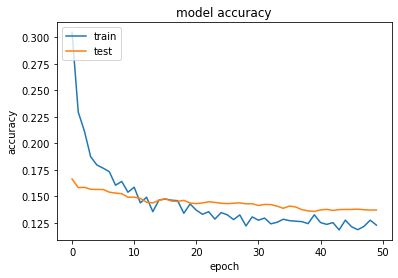

In [12]:
# summarize history for accuracy

plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

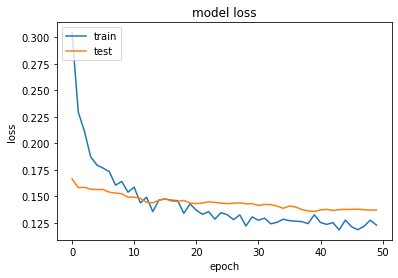

In [13]:
# Summarising history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
y_pred = model.predict(x_test)


In [15]:
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
print('mse = ', mean_squared_error(ytest,y_pred))
print('r2 = ', r2_score(ytest,y_pred))

mse =  0.17226690663730768
r2 =  0.286688555755237


In [16]:
# results with basic now hypertune to resolve
# mse =  0.170309133633045
# r2  = 0.29479517307619596

In [20]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 2.6 MB/s 


In [21]:
# # Keras Hyperparameter tunner

from keras_tuner  import RandomSearch


# # Hyperparameters
# # How many number of hidden layers we should have?
# # How many number of neurons we should have in hidden layers?
# # Learning Rate

# # defining the function to make n neural netwrk dense layer
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


# Initializing tunner for search
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='P',
    project_name='Titanic shipreck pred')




tuner.search_space_summary()


tuner.search(x_train, ytrain,
             epochs=5,
             validation_data=(x_test, ytest))

Trial 5 Complete [00h 00m 10s]
val_mean_absolute_error: 0.24989691376686096

Best val_mean_absolute_error So Far: 0.24468418955802917
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit
